In [2]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# create element tree object 
tree = ET.parse('export.xml') 

# for every health record, extract the attributes into a dictionary (columns). Then create a list (rows).
root = tree.getroot()
record_list = [x.attrib for x in root.iter('Record')]

# create DataFrame from a list (rows) of dictionaries (columns)
data = pd.DataFrame(record_list)

# proper type to dates
for col in ['creationDate', 'startDate', 'endDate']:
    data[col] = pd.to_datetime(data[col])

# value is numeric, NaN if fails
data['value'] = pd.to_numeric(data['value'], errors='coerce')

# some records do not measure anything, just count occurences
# filling with 1.0 (= one time) makes it easier to aggregate
data['value'] = data['value'].fillna(1.0)

# shorter observation names: use vectorized replace function
# data['BodyMass'] = data['type'].str.replace('HKQuantityTypeIdentifierBodyMass', 'BodyMass')
# data['DistanceWalkingRunning'] = data['type'].str.replace('HKCategoryTypeIdentifier', 'DistanceWalkingRunning')
# data
data['type'] = data['type'].str.replace('HKQuantityTypeIdentifier', '')
data['type'] = data['type'].str.replace('HKCategoryTypeIdentifier', '')
data

,type,sourceName,sourceVersion,device,unit,creationDate,startDate,endDate,value
0,StepCount,Sriram’s iphone,13.6.1,"<<HKDevice: 0x2835e8910>, name:iPhone, manufac...",count,2020-08-28 00:58:49-07:00,2020-08-28 00:45:58-07:00,2020-08-28 00:46:01-07:00,4.0
1,StepCount,Sriram’s iphone,13.6.1,"<<HKDevice: 0x2835e8910>, name:iPhone, manufac...",count,2020-10-20 18:16:33-07:00,2020-10-20 18:04:03-07:00,2020-10-20 18:12:57-07:00,548.0
2,StepCount,Sriram’s iphone,13.6.1,"<<HKDevice: 0x2835e8910>, name:iPhone, manufac...",count,2020-10-20 18:27:27-07:00,2020-10-20 18:15:20-07:00,2020-10-20 18:25:21-07:00,206.0
3,StepCount,Sriram’s iphone,13.6.1,"<<HKDevice: 0x2835e8910>, name:iPhone, manufac...",count,2020-10-20 18:36:24-07:00,2020-10-20 18:25:21-07:00,2020-10-20 18:30:33-07:00,527.0
4,StepCount,Sriram’s iphone,13.6.1,"<<HKDevice: 0x2835e8910>, name:iPhone, manufac...",count,2020-10-20 18:47:11-07:00,2020-10-20 18:36:08-07:00,2020-10-20 18:36:44-07:00,22.0
...,...,...,...,...,...,...,...,...,...
163470,SleepAnalysis,iPhone,14.0.1,NaN,NaN,2020-10-15 08:05:02-07:00,2020-10-15 07:57:25-07:00,2020-10-15 08:05:02-07:00,1.0
163471,SleepAnalysis,iPhone,14.0.1,NaN,NaN,2020-10-16 08:05:02-07:00,2020-10-15 22:52:24-07:00,2020-10-16 07:46:59-07:00,1.0
163472,SleepAnalysis,iPhone,14.0.1,NaN,NaN,2020-10-16 08:05:02-07:00,2020-10-16 07:56:18-07:00,2020-10-16 07:58:06-07:00,1.0
163473,SleepAnalysis,iPhone,14.0.1,NaN,NaN,2020-10-19 08:05:01-07:00,2020-10-18 23:03:28-07:00,2020-10-19 07:44:55-07:00,1.0


In [4]:

# pivot and resample
pivot_df = data.pivot_table(index='endDate', columns='type', values='value')
df = pivot_df.resample('M').agg({'WalkingStepLength' : np.mean,
                                 'StepCount' : sum})
pivot_df

type,DistanceWalkingRunning,FlightsClimbed,HKDataTypeSleepDurationGoal,HeadphoneAudioExposure,SleepAnalysis,StepCount,WalkingAsymmetryPercentage,WalkingDoubleSupportPercentage,WalkingSpeed,WalkingStepLength
endDate,,,,,,,,,,
2016-10-20 14:47:13-07:00,0.155343,NaN,NaN,NaN,NaN,343.0,NaN,NaN,NaN,NaN
2016-10-20 14:57:11-07:00,0.498041,NaN,NaN,NaN,NaN,1092.0,NaN,NaN,NaN,NaN
2016-10-20 15:05:01-07:00,0.159512,NaN,NaN,NaN,NaN,336.0,NaN,NaN,NaN,NaN
2016-10-20 15:14:34-07:00,0.005866,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN
2016-10-20 15:23:42-07:00,0.035002,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-10-06 16:47:18-07:00,0.018461,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN
2021-10-06 17:14:19-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.316,2.28168,23.6220
2021-10-06 17:14:31-07:00,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='endDate', ylabel='WalkingStepLength'>

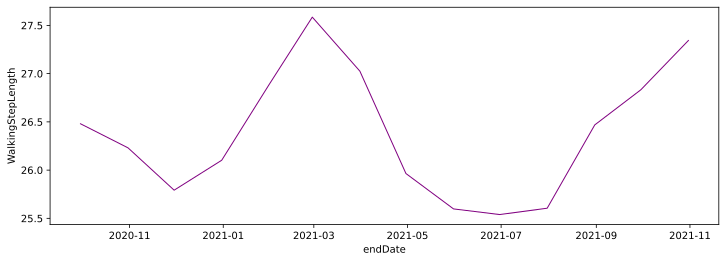

In [8]:
# for jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’



# body mass time series
fig = plt.figure(figsize=(12,4)) 
sns.lineplot(data=df['WalkingStepLength'], color='purple', linewidth=1)